# Sklearn for HPO

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("car_prices.csv", index_col=0)
data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
...,...,...,...,...,...,...,...,...,...,...,...,...
54268,BMW,X6 xDrive50i,2017,29000,Gasoline,445.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Brown,None reported,Yes,29000
54269,Audi,A4 2.0T Premium,2015,94634,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,6500
54270,Porsche,Cayenne S,2013,40989,Gasoline,420.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,At least 1 accident or damage reported,Yes,18950


In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression with GridSearchCV
ridge = Ridge()

# Hyperparameters to tune
ridge_params = {
    'alpha': [0.1, 1.0, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# GridSearchCV
ridge_grid = GridSearchCV(ridge, 
                          ridge_params, 
                          cv=5, 
                          scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_mean_squared_error')

In [41]:
ridge_grid.best_score_

np.float64(-3125.1272976698338)

In [39]:
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation RMSE for Ridge:", np.sqrt(-ridge_grid.best_score_))


Best parameters for Ridge: {'alpha': 0.1, 'solver': 'lsqr'}
Best cross-validation RMSE for Ridge: 55.902838010872344


In [43]:
ridge_grid.best_estimator_

Ridge(alpha=0.1, solver='lsqr')

In [44]:
# Best parameters and performance
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best cross-validation RMSE for Ridge:", np.sqrt(-ridge_grid.best_score_))

# Prediction and evaluation
ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
print("Test RMSE for Ridge:", mean_squared_error(y_test, y_pred_ridge, squared=False))


Best parameters for Ridge: {'alpha': 0.1, 'solver': 'lsqr'}
Best cross-validation RMSE for Ridge: 55.902838010872344
Test RMSE for Ridge: 53.4483652953661


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression with RandomizedSearchCV
lasso = Lasso()

# Hyperparameters to tune
lasso_params = {
    'alpha': np.linspace(-4, 0, 1000),
    'max_iter': [1000, 5000, 10000]
}

# RandomizedSearchCV
lasso_random = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_random.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for Lasso:", lasso_random.best_params_)
print("Best cross-validation RMSE for Lasso:", np.sqrt(-lasso_random.best_score_))

# Prediction and evaluation
lasso_best = lasso_random.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
print("Test RMSE for Lasso:", mean_squared_error(y_test, y_pred_lasso, squared=False))


Best parameters for Lasso: {'alpha': np.float64(0.0), 'max_iter': 1000}
Best cross-validation RMSE for Lasso: 56.06260166970456
Test RMSE for Lasso: 53.85344583323897


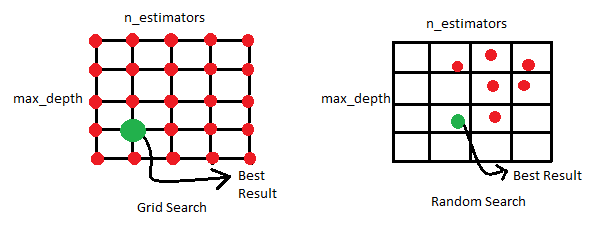

In [58]:

# Best parameters and performance
print("Best parameters for Lasso:", lasso_random.best_params_)
print("Best cross-validation RMSE for Lasso:", np.sqrt(-lasso_random.best_score_))

# Prediction and evaluation
lasso_best = lasso_random.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
print("Test RMSE for Lasso:", mean_squared_error(y_test, y_pred_lasso, squared=False))


Best parameters for Lasso: {'alpha': np.float64(0.0), 'max_iter': 1000}
Best cross-validation RMSE for Lasso: 56.06260166970456
Test RMSE for Lasso: 53.85344583323897


In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ElasticNet with GridSearchCV
elasticnet = ElasticNet()

# Hyperparameters to tune
elasticnet_params = {
    'alpha': np.linspace(0.1, 1000, 1000),
    'l1_ratio': np.linspace(0.1, 1.0, 10),
}

# GridSearchCV
elasticnet_grid = GridSearchCV(elasticnet, 
                                     elasticnet_params, 
                                     cv=5, 
                                     scoring='neg_mean_squared_error', 
                                    #  n_iter=10000, 
                                    #  random_state=42,
                                     n_jobs=8)
elasticnet_grid.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for ElasticNet:", elasticnet_grid.best_params_)
print("Best cross-validation RMSE for ElasticNet:", np.sqrt(-elasticnet_grid.best_score_))

# Prediction and evaluation
elasticnet_best = elasticnet_grid.best_estimator_
y_pred_elasticnet = elasticnet_best.predict(X_test)
print("Test RMSE for ElasticNet:", mean_squared_error(y_test, y_pred_elasticnet, squared=False))


Best parameters for ElasticNet: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(1.0)}
Best cross-validation RMSE for ElasticNet: 55.9364687792109
Test RMSE for ElasticNet: 52.897953506442185


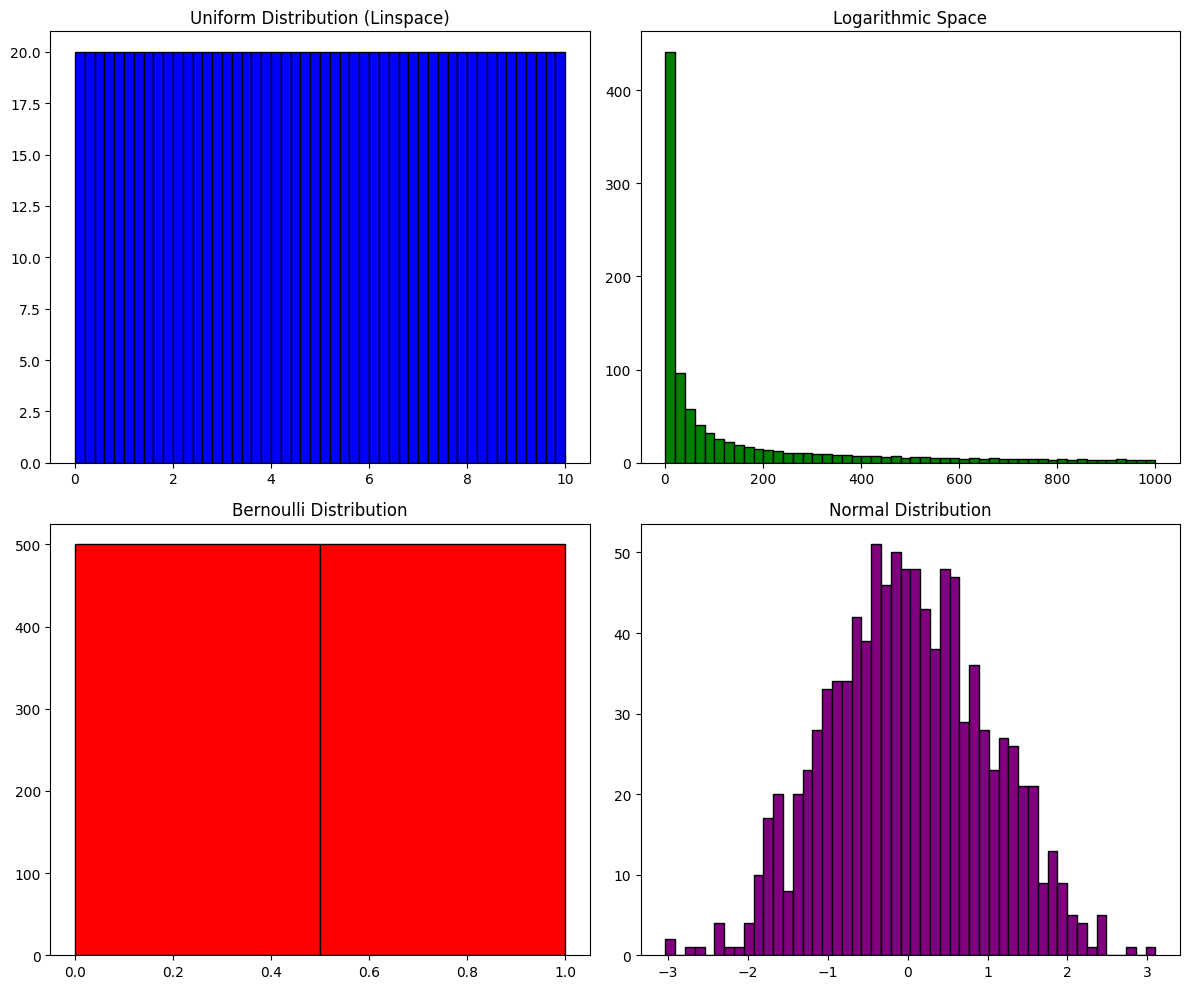

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm

# Uniform distribution using linspace
linspace_data = np.linspace(0, 10, 1000)

# Logarithmic space
logspace_data = np.logspace(0, 3, 1000)

# Bernoulli distribution
bernoulli_data = bernoulli.rvs(p=0.5, size=1000)

# Normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)

# Plotting histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Linspace histogram
axs[0, 0].hist(linspace_data, bins=50, color='blue', edgecolor='black')
axs[0, 0].set_title('Uniform Distribution (Linspace)')

# Logspace histogram
axs[0, 1].hist(logspace_data, bins=50, color='green', edgecolor='black')
axs[0, 1].set_title('Logarithmic Space')

# Bernoulli histogram
axs[1, 0].hist(bernoulli_data, bins=2, color='red', edgecolor='black')
axs[1, 0].set_title('Bernoulli Distribution')

# Normal histogram
axs[1, 1].hist(normal_data, bins=50, color='purple', edgecolor='black')
axs[1, 1].set_title('Normal Distribution')

# Display the plots
plt.tight_layout()
plt.show()


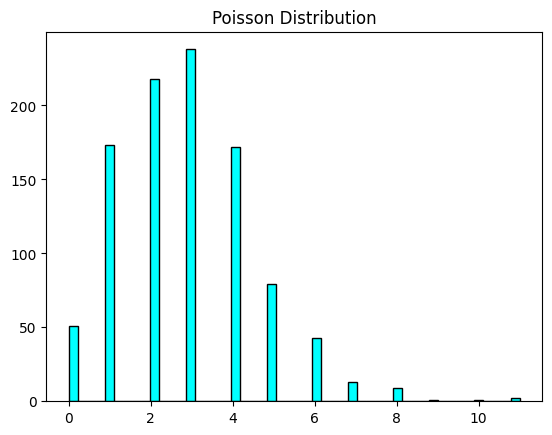

In [17]:
poisson_data = np.random.poisson(lam=3, size=1000)
plt.hist(poisson_data, bins=50, color='cyan', edgecolor='black')
plt.title('Poisson Distribution')
plt.show()


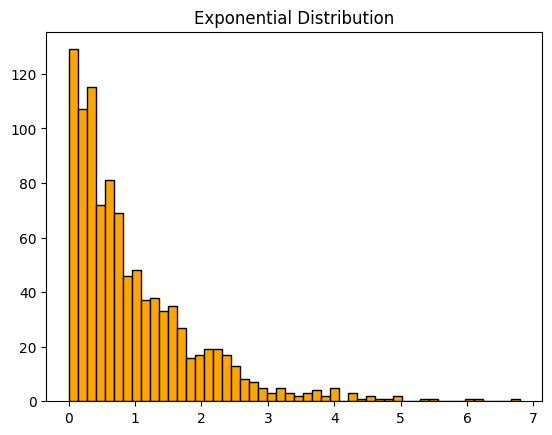

In [18]:
exponential_data = np.random.exponential(scale=1.0, size=1000)
plt.hist(exponential_data, bins=50, color='orange', edgecolor='black')
plt.title('Exponential Distribution')
plt.show()


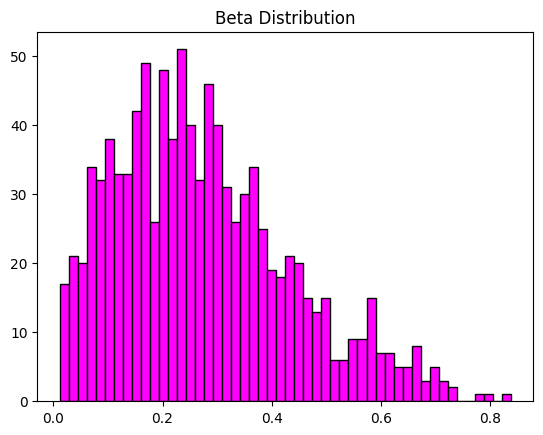

In [19]:
beta_data = np.random.beta(a=2.0, b=5.0, size=1000)
plt.hist(beta_data, bins=50, color='magenta', edgecolor='black')
plt.title('Beta Distribution')
plt.show()


In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression with RandomizedSearchCV
ridge = Ridge()

# Hyperparameters to tune
ridge_params = {
    'alpha': np.logspace(-4, 4, 1000),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# RandomizedSearchCV
ridge_random = RandomizedSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error', n_iter=100, random_state=42)
ridge_random.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for Ridge:", ridge_random.best_params_)
print("Best cross-validation RMSE for Ridge:", np.sqrt(-ridge_random.best_score_))

# Prediction and evaluation
ridge_best = ridge_random.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
print("Test RMSE for Ridge:", mean_squared_error(y_test, y_pred_ridge, squared=False))


Best parameters for Ridge: {'solver': 'auto', 'alpha': np.float64(0.06963744730628223)}
Best cross-validation RMSE for Ridge: 55.87424196059124
Test RMSE for Ridge: 53.49307905127214


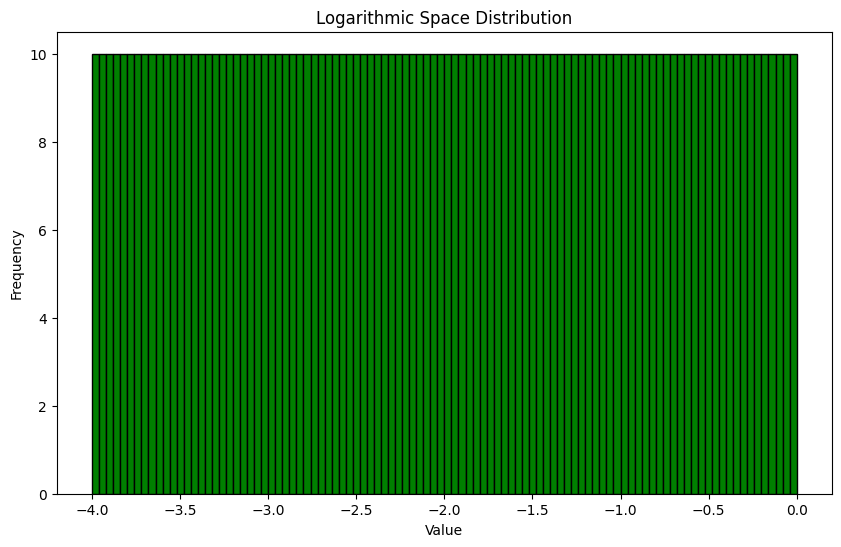

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Generate logspace data
logspace_data = np.linspace(-4, 0, 1000)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(logspace_data, bins=100, color='green', edgecolor='black')
# plt.xscale('log')  # Set x-axis to log scale to better visualize the distribution
plt.title('Logarithmic Space Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
# print(logspace_data)
plt.show()


In [68]:
from sklearn.model_selection import ParameterGrid

# Example parameter grid
elasticnet_params = {
    'alpha': np.logspace(-4, 0, 1000),
    'l1_ratio': np.linspace(0.1, 1.0, 1000),
    'max_iter': [1000, 5000, 10000, 2000]
}


# Generate all combinations
param_combinations = list(ParameterGrid(elasticnet_params))

# Display the number of combinations and the combinations themselves
print("Total number of combinations:", len(param_combinations))

Total number of combinations: 4000000


In [66]:
list(ParameterGrid(elasticnet_params))

[{'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.1)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.2)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.30000000000000004)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.4)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.5)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.6)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.7000000000000001)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.8)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.9)},
 {'alpha': np.float64(0.1), 'l1_ratio': np.float64(1.0)},
 {'alpha': np.float64(1.100900900900901), 'l1_ratio': np.float64(0.1)},
 {'alpha': np.float64(1.100900900900901), 'l1_ratio': np.float64(0.2)},
 {'alpha': np.float64(1.100900900900901),
  'l1_ratio': np.float64(0.30000000000000004)},
 {'alpha': np.float64(1.100900900900901), 'l1_ratio': np.float64(0.4)},
 {'alpha': np.float64(1.100900900900901), 'l1_ratio': np.float64(0.5)},
 {'alpha': 